In [74]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [34]:
from keras.applications import ResNet50

In [37]:
resnet = ResNet50(include_top= False, input_shape= (256,256,3))

In [38]:
resnet.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)    │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 262, 262, 3)       │               0 │ input_layer_9[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 128, 128, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 128, 128, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 128, 128, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 130, 130, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 64, 64, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 64, 64, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 64, 64, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 64, 64, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 64, 64, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 64, 64, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [2]:
# About the problem - Glaucoma dataset
# Glaucoma is caused by increased pressure in the eye (called intraocular pressure) that damages the optic nerve (the nerve connecting the eye to the brain)
# Aqueous humor(which flows inside the eye) flows out through a drainage system called the trabecular meshwork If the trabecular meshwork becomes clogged or damaged, 
# or if the drainage angle narrows, the aqueous humor can't leave the eye properly. This causes the fluid to build up inside the eye.
#As the fluid accumulates, it creates higher pressure inside the eye, which can press on and damage the optic nerve. This damage leads to vision loss.
# Fundus photography involves photographing the rear of an eye

In [6]:
# About the dataset
# labels are divided into 2 classes - Referable Glaucoma & Non-referable Glaucoma
# Referable Glaucoma: The patient shows signs of glaucoma that are significant enough to require a referral to an eye care specialist (like an ophthalmologist) for further testing or treatment.
# Non-Referable Glaucoma (NRG): The patient does not currently have signs or symptoms that suggest glaucoma requiring referral or treatment.

In [178]:
training_dataset = keras.utils.image_dataset_from_directory("eyepac-light-v2-512-jpg/train/", image_size= (128,128), crop_to_aspect_ratio= True)
validation_dataset = keras.utils.image_dataset_from_directory("eyepac-light-v2-512-jpg/validation/", image_size= (128,128), crop_to_aspect_ratio= True)

Found 8000 files belonging to 2 classes.
Found 770 files belonging to 2 classes.


(32, 128, 128, 3)


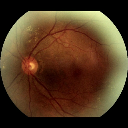

In [179]:
for batch in training_dataset.take(1):
    print(batch[0].shape)
keras.utils.array_to_img(batch[0][0])

In [180]:
training_dataset = training_dataset.map(lambda images, targets: (images/255, targets))
validation_dataset = validation_dataset.map(lambda images, targets: (images/255, targets))

In [ ]:
# goal: to build a CNN-classification model that predicts if a person has status: RG or NRG

In [203]:
input_image = keras.Input(shape = (128, 128 ,3))

# output = activation(conv2d(inputs, kernel) + bias)
x = keras.layers.Conv2D(32, kernel_size= 3, padding = 'same', activation = 'relu')(input_image)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(64, kernel_size= 3, padding = 'same', activation = 'relu')(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(128, kernel_size= 3, padding = 'same', activation = 'relu')(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(256, kernel_size= 3, padding = 'same', activation = 'relu')(x)
x = keras.layers.MaxPooling2D()(x)
x = keras.layers.Conv2D(512, kernel_size= 3, padding = 'same', activation = 'relu')(x)

# Flatten layer cannot handle inputs with variable spatial dimensions (None for height and width - providing input as (None, None, 3) to handle variable sized images). 
# The Flatten layer expects the input dimensions to be fully defined so it can convert the input into a 1D vector
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(256, activation = 'relu')(x)
x = keras.layers.Dense(128, activation = 'relu')(x)
output_probability = keras.layers.Dense(1, activation = 'sigmoid')(x)

model = keras.Model(inputs = input_image, outputs = output_probability)

In [204]:
model.summary()

Model: "functional_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_44 (InputLayer)          │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_229 (Conv2D)                  │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_140 (MaxPooling2D)     │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_230 (Conv2D)                  │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_141 (MaxPooling2D)     │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_231 (Conv2D)                  │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_142 (MaxPooling2D)     │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_232 (Conv2D)                  │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_143 (MaxPooling2D)     │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_233 (Conv2D)                  │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_28 (Flatten)                 │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 256)                 │       8,388,864 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,990,465 (38.11 MB)

 Trainable params: 9,990,465 (38.11 MB)

 Non-trainable params: 0 (0.00 B)

In [205]:
# Accuracy vs Binary Accuracy
model.compile(optimizer = keras.optimizers.Adam(), loss= keras.losses.BinaryCrossentropy(), metrics = [keras.metrics.BinaryAccuracy()])

In [206]:
early_stopping = keras.callbacks.EarlyStopping(patience= 3)
model_checkpoint = keras.callbacks.ModelCheckpoint('glaucoma_best.keras', save_best_only= True)

In [207]:
history = model.fit(training_dataset, epochs = 12, validation_data= validation_dataset, callbacks= [early_stopping, model_checkpoint])

Epoch 1/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 143s 554ms/step - binary_accuracy: 0.5011 - loss: 0.6969 - val_binary_accuracy: 0.5000 - val_loss: 0.6934
Epoch 2/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 79s 316ms/step - binary_accuracy: 0.4947 - loss: 0.6934 - val_binary_accuracy: 0.4935 - val_loss: 0.6928
Epoch 3/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 321ms/step - binary_accuracy: 0.5101 - loss: 0.6935 - val_binary_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 325ms/step - binary_accuracy: 0.4974 - loss: 0.6935 - val_binary_accuracy: 0.5000 - val_loss: 0.6928
Epoch 5/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 82s 329ms/step - binary_accuracy: 0.5152 - loss: 0.6935 - val_binary_accuracy: 0.5519 - val_loss: 0.6917
Epoch 6/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 83s 332ms/step - binary_accuracy: 0.5168 - loss: 0.6933 - val_binary_accuracy: 0.5130 - val_loss: 0.6897
Epoch 7/12
250/250 ━━━━━━━━━━━━━━━━━━━━ 87s 349ms/step - binary_accuracy: 0.5268 - loss: 0.6923 - val_binary_accuracy: 0.5623 - v

In [215]:
testing_dataset = keras.utils.image_dataset_from_directory("eyepac-light-v2-512-jpg/test/", image_size= (128,128), crop_to_aspect_ratio= True)

Found 770 files belonging to 2 classes.


In [216]:
model.evaluate(testing_dataset)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - binary_accuracy: 0.5555 - loss: 11.6673


[11.892523765563965, 0.5428571701049805]

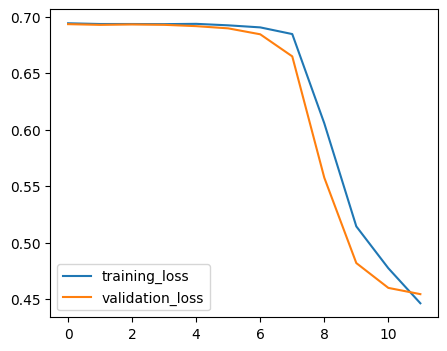

In [209]:
plt.figure(figsize= (5,4))
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

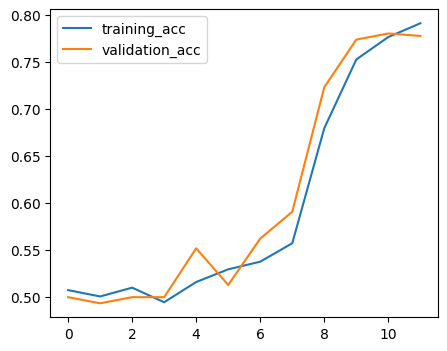

In [214]:
plt.figure(figsize= (5,4))
plt.plot(history.history['binary_accuracy'], label = 'training_acc')
plt.plot(history.history['val_binary_accuracy'], label = 'validation_acc')
plt.legend()
plt.show()

C:\Users\likhi\AppData\Local\Temp\ipykernel_30164\510486855.py:1: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(2*x))


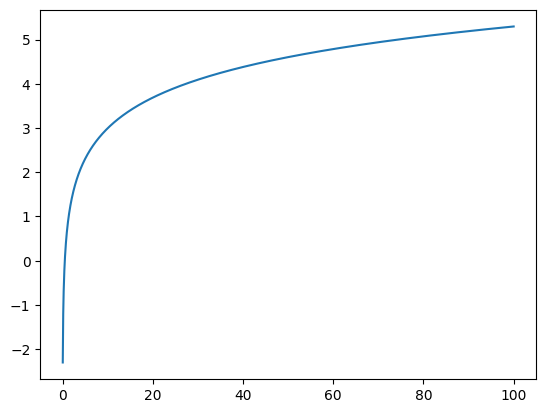

In [79]:
plt.plot(x, np.log(2*x))